In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import chain
import math

In [2]:
# Create pandas dataframe from csv
df = pd.read_csv("complete_data.csv", sep=",", header=None, names=["id","name","aka","link","image_url","worked_as","worked_in","DOB","YOB","DOD","YOD"])

In [3]:
# Create data
dictionary = {'Years': [1830, 1835, 1840, 1845, 1850, 1855, 1860, 1865, 1870, 1875, 1880, 1885, 1890, 1895, 1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000],
              'Count': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

#Foreach row in dataframe
for index, row in df.iterrows():
    YOB = row['YOB'];
    YOD = row['YOD'];
    
    #Skip headline
    if(YOB == 'YOB' or YOD == 'YOD' or len(str(YOB)) > 4 or len(str(YOD)) > 4):
        continue;
    
    #Skip empty values
    if(math.isnan(float(YOB)) or math.isnan(float(YOD))):
        continue;
    
    #Add to histogram
    for i in range(len(dictionary['Years'])):
        year = dictionary['Years'][i]
        if(int(YOB) <= year and int(YOD) >= year):
            dictionary['Count'][i] += 1;
    
#Convert to dataframe
data = pd.DataFrame(data=dictionary)

In [4]:
# Print a short overview of the dataframe
data

,Years,Count
0,1830,0
1,1835,0
2,1840,0
3,1845,3
4,1850,4
5,1855,6
6,1860,9
7,1865,19
8,1870,28
9,1875,55


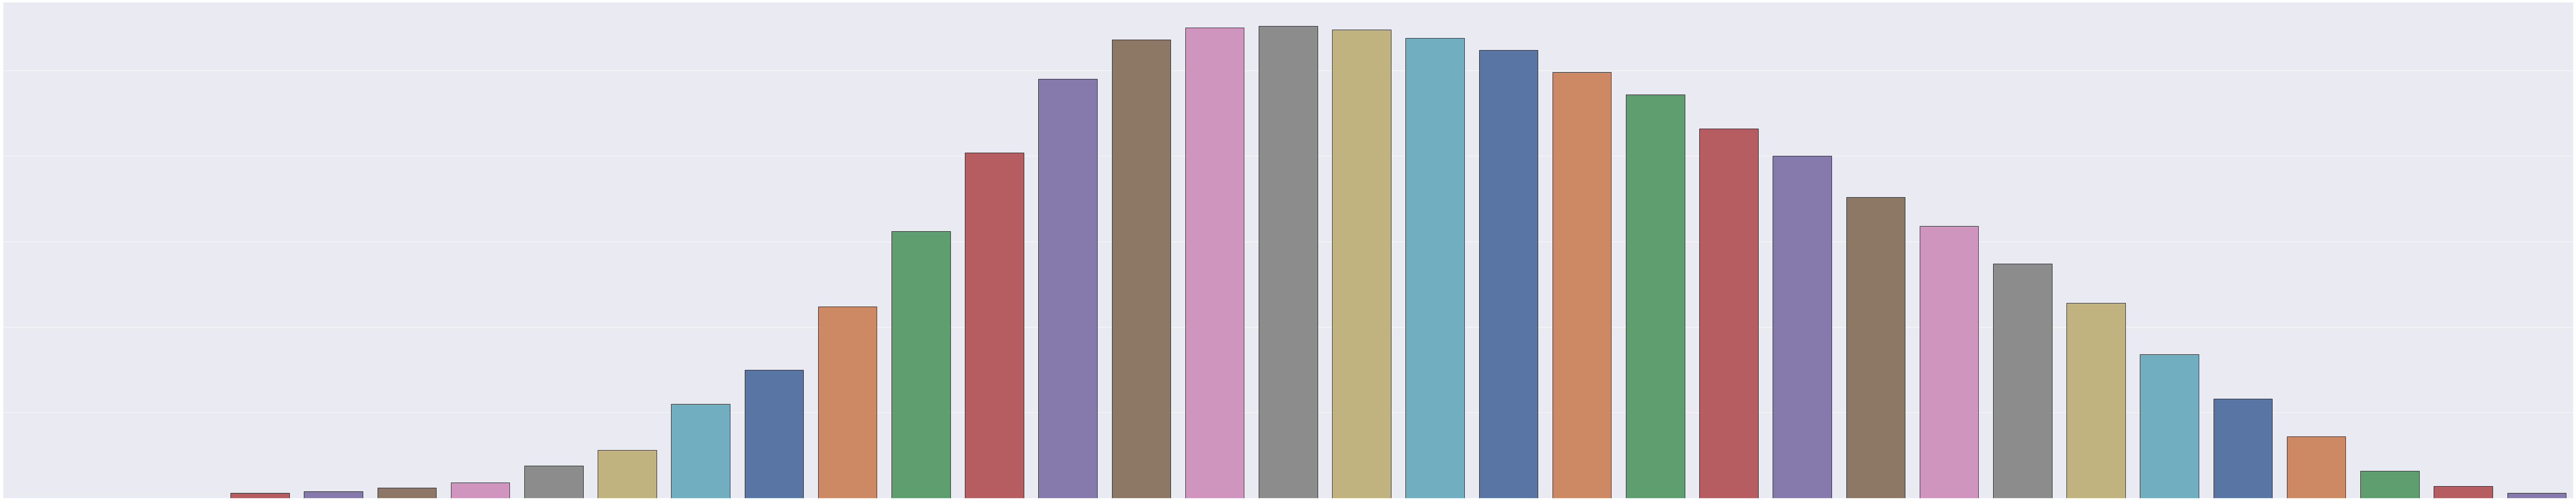

In [8]:
# Pre style setting (can be changed depending on what looks more appropriate)
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set(rc={'figure.figsize':(1.7,8.27)})

# Render a bar plot for each yearspan
data_plt = sns.catplot(
    x="Years",
    y="Count", 
    data=data, 
    kind="bar",
    palette="deep",
    edgecolor="black", 
    height = 18,
    aspect = 5
    )
data_plt.set_xlabels("")
data_plt.set_ylabels("")
data_plt.set(xticklabels=[])
data_plt.set(xlabel=None)
data_plt.set(yticklabels=[])
data_plt.set(ylabel=None)

#Save to file
plt.savefig('map_histogram.png', bbox_inches='tight')